# Eigendecomposition

https://github.com/mikexcohen/LinAlg4DataScience/blob/main/LA4DS_ch13.ipynb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
matrix = np.array([[1,2], [3,4]])

# Finding eigenvectors
evals,evecs = np.linalg.eig(matrix)

print(evals)
print(evecs)

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [7]:
D = np.diag(evals)
print(D)

[[-0.37228132  0.        ]
 [ 0.          5.37228132]]


In [ ]:
print(matrix @ evecs)
print(evecs @ D)

[[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]
[[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]


In [12]:
evecs@D

array([[ 0.30697009, -2.23472698],
       [-0.21062466, -4.88542751]])

In [ ]:
# Special properties 
A = np.random.randint(-3, 4, (3,3))
A = A.T@A

# eigendecomp
L,V = np.linalg.eig(A)

# all pairwise dot products
print(np.dot(V[:,0],V[:,1]))
print(np.dot(V[:,0],V[:,2]))
print(np.dot(V[:,1],V[:,2]))


-3.903127820947816e-16
0.0
-8.326672684688674e-17


In [12]:
print(V.T)
print(np.linalg.inv(V))

[[ 0.490951    0.76266883 -0.42107407]
 [ 0.83404807 -0.55109254 -0.02570656]
 [ 0.25165637  0.33857535  0.9066619 ]]
[[ 0.490951    0.76266883 -0.42107407]
 [ 0.83404807 -0.55109254 -0.02570656]
 [ 0.25165637  0.33857535  0.9066619 ]]


In [17]:
# A singular matrix
A = np.array([[1,4,7],
              [2,5,8],
              [3,6,9]])

L,V = np.linalg.eig(A)

# print its rank...
print( f'Rank = {np.linalg.matrix_rank(A)}\n' )
# ... and its eigendecomposition
print('Eigenvalues: ')
print(L.round(2)), print(' ')
print('Eigenvectors:')
print(V.round(2))
     

Rank = 2

Eigenvalues: 
[16.12 -1.12 -0.  ]
 
Eigenvectors:
[[-0.46 -0.88  0.41]
 [-0.57 -0.24 -0.82]
 [-0.68  0.4   0.41]]


In [11]:
# Created correlated matrices
A = np.random.randn(4,4)
A = A@A.T
B = np.random.rand(4,4)
B = B@B.T + A/10

from scipy.linalg import eigh
evals, evecs = eigh(A,B)

print(evals)
print(evecs)

[6.86234510e-05 9.48104536e-01 8.61461752e+00 9.31918195e+00]
[[-0.2928518   0.15693184 -1.09680621  0.17187026]
 [-0.51373574 -0.72580359  0.21138025 -0.29537818]
 [-0.20081297  0.4694906   0.32250247  0.39075471]
 [ 0.07691362  0.51294831 -0.08692928 -0.46877062]]


In [22]:
# Exercise 13-1
A = np.random.randn(3,3)
A = A.T@A

A_inv = np.linalg.inv(A)

eigvals_A = np.linalg.eig(A)[0]
eigvals_Ainv = np.linalg.eig(A_inv)[0]

print(np.sort(eigvals_A))
print(np.sort(eigvals_Ainv))
print(np.sort(1/eigvals_Ainv))

[1.87469127 4.24616052 9.34949557]
[0.10695764 0.23550688 0.53342116]
[1.87469127 4.24616052 9.34949557]


In [29]:
# Exercise 13-3
# instructions don't specify matrix size; I'll use n=5
N = 5

# to store the reconstruction accuracies
reconAcc = np.zeros(4)

# Create a symmetric random-integers matrix
A = np.random.randn(N,N)
A = np.round( A.T+A )

# diagonalize the matrix
d,V  = np.linalg.eig(A)
D    = np.diag(d)

# demonstrate reconstruction accuracy
# remember that inv(V)=V.T!
Arecon = V @ D @ V.T
print(np.round( A-Arecon ,4))

reconAcc[0] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[0]}')

[[ 0. -0.  0.  0. -0.]
 [-0.  0. -0. -0.  0.]
 [ 0. -0. -0.  0.  0.]
 [ 0. -0.  0.  0. -0.]
 [-0.  0.  0. -0. -0.]]

Frobenius distance: 6.158189158831192e-15


In [30]:
# create D-tilde
Dtild = np.diag( d[np.random.permutation(N)] )

# test reconstruction accuracy
Arecon = V @ Dtild @ V.T
print(np.round( A-Arecon ,4))

reconAcc[1] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[1]}')

[[ 0.1358 -0.1127 -0.5448 -3.1579 -0.1274]
 [-0.1127  0.2932  0.9416  0.5698  0.025 ]
 [-0.5448  0.9416  2.5483 -1.3987  0.0121]
 [-3.1579  0.5698 -1.3987 -3.0214  0.5455]
 [-0.1274  0.025   0.0121  0.5455  0.0441]]

Frobenius distance: 6.5770102200457305


In [31]:
### swap only the two largest eigenvalues
evals_sort_idx = np.argsort(d) # note: default is to sort 
i = evals_sort_idx[np.r_[np.arange(N-2),N-1,N-2]][::-1]

# create D-tilde
Dtild = np.diag( d[i] )

# test reconstruction accuracy
Arecon = V @ Dtild @ V.T
print(np.round( A-Arecon ,4))

reconAcc[2] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[2]}')

[[ 0.0606  0.3192 -0.4556 -1.1922  0.2878]
 [ 0.3192  1.2129 -0.7433  0.4212 -0.0343]
 [-0.4556 -0.7433 -1.4382  0.0029  0.1476]
 [-1.1922  0.4212  0.0029 -1.4611  0.1261]
 [ 0.2878 -0.0343  0.1476  0.1261  1.6258]]

Frobenius distance: 3.672339634650853


In [32]:
### swap only the two smallest eigenvalues
evals_sort_idx = np.argsort(d) # note: default is to sort 
i = evals_sort_idx[np.r_[1,0,np.arange(2,N)]][::-1]

# create D-tilde
Dtild = np.diag( d[i] )

# test reconstruction accuracy
Arecon = V @ Dtild @ V.T
print(np.round( A-Arecon ,4))

reconAcc[3] = np.sqrt(np.sum( (A-Arecon)**2 ))
print(f'\nFrobenius distance: {reconAcc[3]}')

[[ 0.8956 -0.3211 -0.3951 -1.8301 -0.2342]
 [-0.3211  0.1081  0.1008  0.4734  0.0783]
 [-0.3951  0.1008 -0.0631 -0.2531  0.0706]
 [-1.8301  0.4734 -0.2531 -0.9973  0.3323]
 [-0.2342  0.0783  0.0706  0.3323  0.0567]]

Frobenius distance: 3.1595109030510358


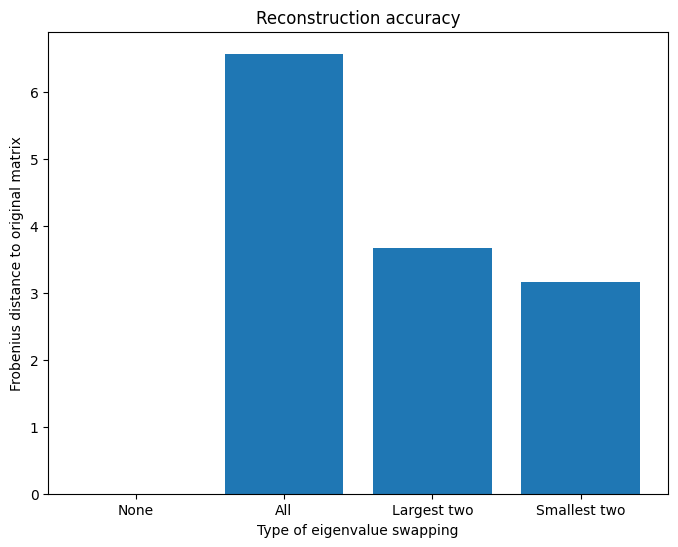

In [33]:
# now for the plot

plt.figure(figsize=(8,6))

plt.bar(range(4),reconAcc)
plt.xticks(range(4),labels=['None','All','Largest two','Smallest two'])
plt.ylabel('Frobenius distance to original matrix')
plt.xlabel('Type of eigenvalue swapping')
plt.title('Reconstruction accuracy')

plt.show()

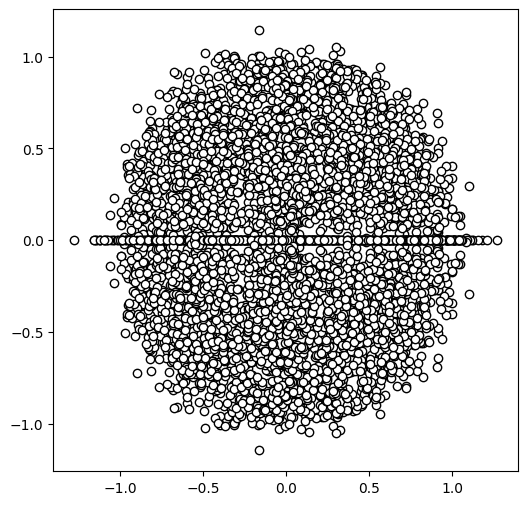

In [46]:
# Exercise 13-4

n = 123
M = 42 

out_mat = np.zeros((n,M),dtype=complex)

for i in range(n):
    A = np.random.randn(M,M)
    eigvals = np.linalg.eig(A)[0]
    eigvals_tmp = eigvals / np.sqrt(M)
    out_mat[i,:] = eigvals_tmp

# Plot
plt.figure(figsize=(6,6))
plt.plot(out_mat, np.imag(out_mat), 'ko', markerfacecolor="white")
plt.show()

In [76]:
# Exercise 13-5
A = np.random.randn(3,3)
A = A.T@A

evals,evecs = np.linalg.eigh(A)

from scipy.linalg import null_space

for i in range(3):
    nullV = null_space( A - evals[i]*np.eye(3))
    r = np.corrcoef(nullV.T, evecs[[i],:])[0,1]

    print(f'Correlation between N(A-lI) and evec {i}: {np.abs(r):.2f}')


# The vectors in the null space of the shifted symmetric matrix are the eigenvectors

Correlation between N(A-lI) and evec 0: 1.00
Correlation between N(A-lI) and evec 1: 0.98
Correlation between N(A-lI) and evec 2: 0.90


In [96]:
# Exercise 13-6
Lambda = np.diag([1,2,3,4])

Q,_ = np.linalg.qr(np.random.randn(4,4))

A = Q @ Lambda @ Q.T
print(Q)

evals,evecs = np.linalg.eig(A)

print(evals)
print(evecs)

[[-0.19162099 -0.06308782  0.94724688 -0.24904755]
 [-0.90750196 -0.26809607 -0.12278576  0.29914604]
 [-0.16211676 -0.31303552 -0.28776108 -0.89046082]
 [-0.33680819  0.90892969 -0.06957423 -0.23572545]]
[4. 3. 1. 2.]
[[ 0.24904755 -0.94724688 -0.19162099 -0.06308782]
 [-0.29914604  0.12278576 -0.90750196 -0.26809607]
 [ 0.89046082  0.28776108 -0.16211676 -0.31303552]
 [ 0.23572545  0.06957423 -0.33680819  0.90892969]]


In [ ]:
# Exercise 13-8
R = np.array([[ 1,.2,.9],
              [.2, 1,.3],
              [.9,.3, 1] ])

# eigendecomp
d,V = np.linalg.eig(R)
D = np.diag(d)

Y = V @ np.sqrt(D) @ np.random.randn(3,10000)

np.corrcoef(Y)



array([[1.        , 0.20576639, 0.89978746],
       [0.20576639, 1.        , 0.29513579],
       [0.89978746, 0.29513579, 1.        ]])

In [ ]:
# Exercise 13-9

Y_tild = Y.T @ V @ np.sqrt(D)

np.round(np.corrcoef(Y_tild.T), 3)

array([[1.   , 0.002, 0.009],
       [0.002, 1.   , 0.029],
       [0.009, 0.029, 1.   ]])

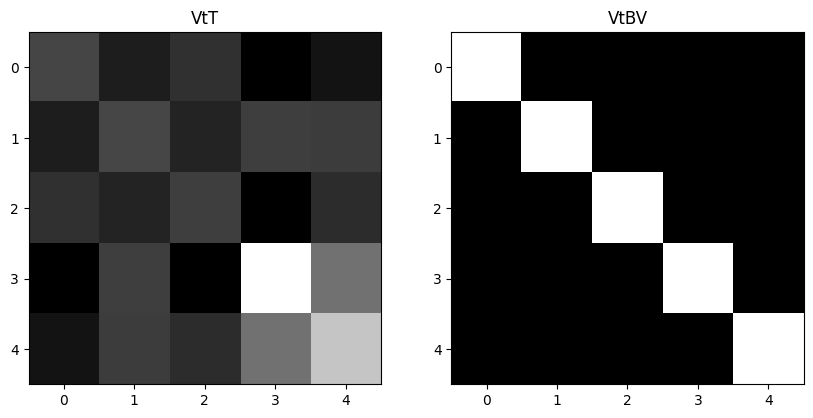

In [130]:
# Exercise 13-10

n = 5
A = np.random.randn(n,n)
A = A.T@A
B = np.random.randn(n,n)
B = B.T@B

evals,evecs = eigh(A,B)

# eigenvectors times their transposes
VV  = evecs.T @ evecs
VBV = evecs.T @ B @ evecs

# show in an image
_,axs = plt.subplots(1,2,figsize=(10,6))

axs[0].imshow(VV,cmap='gray')
axs[0].set_title('VtT')

axs[1].imshow(VBV,cmap='gray')
axs[1].set_title('VtBV')

plt.show()
